<a href="https://colab.research.google.com/github/RamadhanA1/HeartDisesase_Analysis_Modelling/blob/main/SC62117_RamadhanAmannu_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - Data Preprocessing

## Question
1. Data Preparation. Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:
  * Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
  *Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
  * Outlier: Memeriksa outlier dan menangani outlier jika ada.
  * Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
  * Feature encoding: Melakukan feature encoding jika diperlukan.
2. Exploratory Data Analysis (EDA). Menggunakan dataset yang sama, Peserta diminta untuk:
  * Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
  * Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
  * Menemukan dan mendeskripsikan statistical five summaries
  * Mendeskripsikan distribusi data
3. Feature Engineering. Menggunakan dataset yang sama, **Peserta diminta untuk dapat membuat minimal 10 fitur baru** yang relevan dan signifikan untuk dapat membantu membantu bisnis ecommerce dalam menghadapi tantangan bisnis yang ada.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

## Dataset
* Sales/Marketing: https://www.kaggle.com/competitions/home-data-for-ml-course/data
* Health Case Study: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Data Collection

In [ ]:
# Memanggil Dataset dari Kaggle

#Unggah API Key Kaggle
import gdown
from google.colab import files
url = 'https://drive.google.com/uc?id=' + '1BGmWJeTAanBw2amHmY6Fm7OYMQXs5pR6'
gdown.download(url)


Downloading...
From: https://drive.google.com/uc?id=1BGmWJeTAanBw2amHmY6Fm7OYMQXs5pR6
To: /content/kaggle.json
100%|██████████| 70.0/70.0 [00:00<00:00, 185kB/s]


'kaggle.json'

In [ ]:
#Menghubungkan Google Colab dengan Kaggle
!pip install -q kaggle

In [ ]:
mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
#Mengunduh Dataset dari Kaggle
!kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 10.8MB/s]


In [ ]:
#Proses Ekstraksi Dataset
from zipfile import ZipFile
with ZipFile('/content/heart-disease-dataset.zip', 'r') as zipObj:
  zipObj.extractall('/content/dataset')

**Pada kesempatan kali ini saya akan menggunakan Hearth Disease Dataset**

- Deskripsi Dataset
    
  *This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.*

  Kumpulan data ini berasal dari tahun 1988 dan terdiri dari empat basis data: Cleveland, Hungaria, Swiss, dan Long Beach V. Ini mengandung 76 atribut, termasuk atribut yang diprediksi, tetapi semua eksperimen yang dipublikasikan merujuk pada penggunaan subset 14 dari mereka. Bidang "target" mengacu pada kehadiran penyakit jantung pada pasien. Ini bernilai bilangan bulat 0 = tidak ada penyakit dan 1 = terdapat penyakit


- Attribute Information:
  1. age: age (year old)
  2. sex: sex
    - 1 = male;
    - 0 = female
  3. cp: chest pain type
    - 0 = typical angina;
    - 1 = atypical angina;
    - 2 = non-anginal pain;
    - 3 = asymptomatic
  4. trestbps: resting blood pressure in mm Hg ( on admission to the hospital)
  5. chol: serum cholestoral in mg/dl
  6. fbs: fasting blood sugar > 120 mg/dl
    - 1 = true;
    - 0 = false
  7. restecg: resting electrocardiographic results
    - 0 = normal
    - 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
  8. thalach: maximum heart rate achieved
  9. exang: exercise induced angina
    - 1 = yes;
    - 0 = no
  10. oldpeak = ST depression induced by exercise relative to rest
  11. slope: the slope of the peak exercise ST segment
    - 0 = upsloping
    - 1 = flat
    - 2 = downsloping
  12. ca: number of major vessels (0-3) colored by flourosopy
  13. thal:
    - 0 = normal;
    - 1 = fixed defect;
    - 2 = reversable defect
  14. target:
    - 0 = not disease;
    - 1 = disease

  The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

  variable info source:
  https://archive.ics.uci.edu/dataset/45/heart+disease

In [ ]:
import pandas as pd

# Proses Membaca Dataset
df = pd.read_csv('/content/dataset/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 1. Data Preparation

In [ ]:
# Melihat informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Memperbaiki tipe data variable
change_type = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']
df[change_type] = df[change_type].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


## a. Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.

In [ ]:
# Menghitung jumlah data null pada setiap kolom variable
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Menghitung jumlah data null secara keseluruhan
print('Total Missing Values: ', df.isnull().sum().sum())

Total Missing Values:  0


Coclusion: Berdasarkan pengecekan, tidak ditemukan adanya null values pada dataset

## b. Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.

In [ ]:
# Proses penghitungan data yang memiliki duplikat
print('Total Data Duplikat: ',df.duplicated().sum())

Total Data Duplikat:  723


In [ ]:
df.duplicated().describe()

count     1025
unique       2
top       True
freq       723
dtype: object

In [ ]:
# Menyalin Dataset untuk tahap selanjutnya
df_1 = df

# Menghapus data yang terindikasi duplikasi
df_1.drop_duplicates(inplace=True)
df_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# Mengecek kembali jumlah duplikasi data
print('Total Data Duplikat: ',df.duplicated().sum())

Total Data Duplikat:  0


## c. Outlier: Memeriksa outlier dan menangani outlier jika ada.

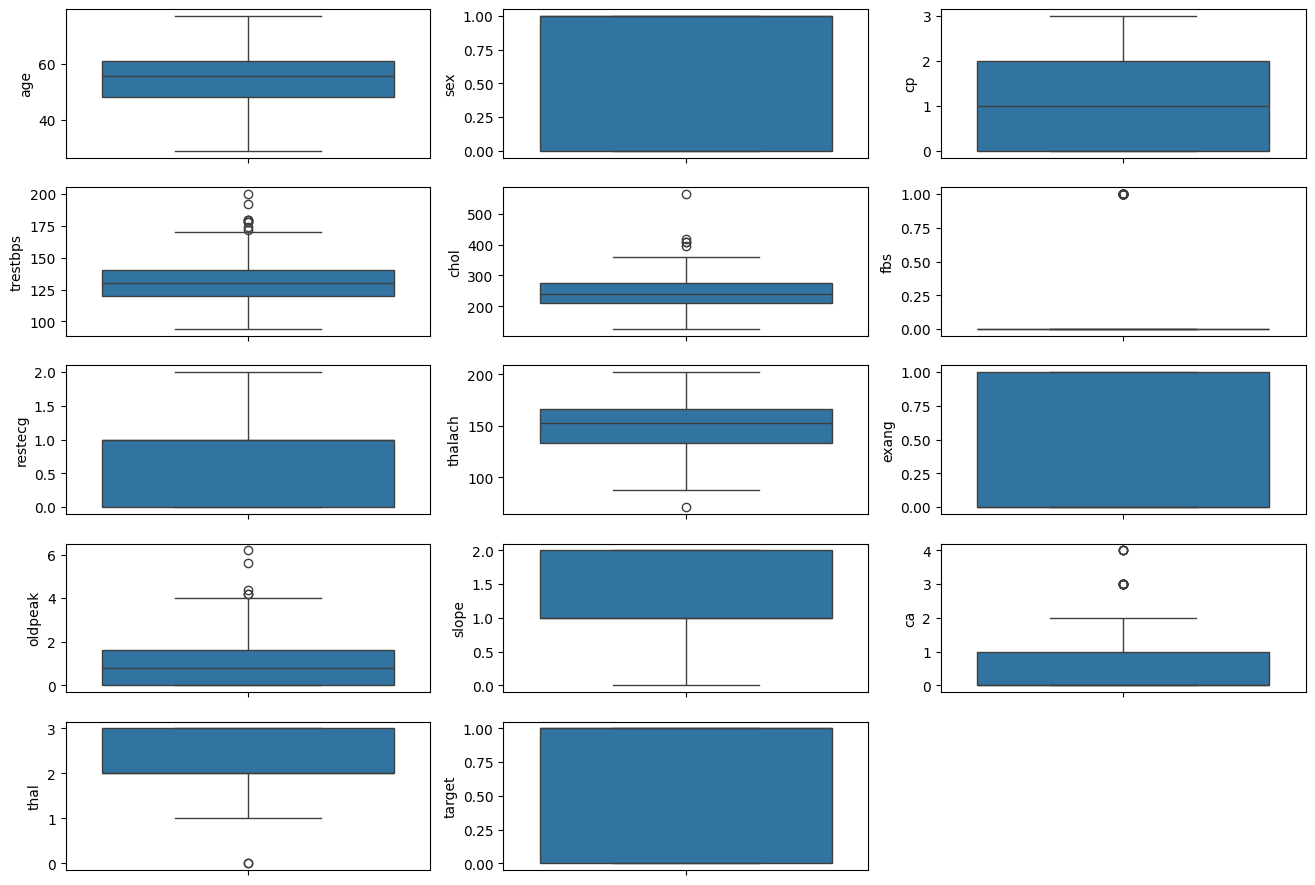

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# set ukuran figure
plt.figure(figsize=(16,32))

# Fungsi Perulangan untuk mencetak Distplot dan Boxplot Variable
# var0 = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i, column in enumerate(df.columns):
  # plt.subplot(20,2,(1 + 2*i))
  # sns.distplot(df_1[column])

  plt.subplot(14,3,i+1)
  sns.boxplot(df_1[column])

plt.show()

Berdasarkan distplot dan boxplot diatas, diperoleh bahwa
1. variable age tidak terdapat outlier
2. variable trestbps,chol, fbs, thalach, oldpeak, ca, thal memiliki outlier
<!-- 3. variable yang memiliki outlier akan dilakukan pemangkasan -->
3. Pada kesempatan ini, outlier akan dipertahankan untuk melihat insight apa yg muncul. Proses selanjutnya hanya akan menampilkan outlier tiap atribut tanpa mengeliminasinya

In [ ]:
df_1_num = [col for col in df_1.columns if df_1[col].dtype != 'object']
df_1_num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [ ]:
# Menentukan IQR, batas atas, & batas bawah

# keterangan:
# iqr = selisih quartil
# q3 = quartil atas
# q1 = quartil bawah
# ba = batas atas
# bb = batas bawah

# Perulangan untuk mendapatkan IQR, q3, q1, ba, dan bb tiap variabel
# var = ['trestbps', 'chol', 'thalach', 'oldpeak']
var = df_1_num
q3 = []
q1 = []
iqr = []
ba = []
bb = []

for i in range(6):
    q3_s, q1_s = np.percentile(df_1[var[i]], [75 ,25])
    iqr_s = q3_s - q1_s
    ba_s = q3_s + 1.5 * iqr_s
    bb_s = q1_s - 1.5 * iqr_s

    q3 = np.append(q3,q3_s)
    q1 = np.append(q1,q1_s)
    iqr = np.append(iqr,iqr_s)
    ba = np.append(ba,ba_s)
    bb = np.append(bb,bb_s)

display(np.column_stack([var, q3, q1, iqr, ba, bb]))


array([['age', '61.0', '48.0', '13.0', '80.5', '28.5'],
       ['trestbps', '140.0', '120.0', '20.0', '170.0', '90.0'],
       ['chol', '274.75', '211.0', '63.75', '370.375', '115.375'],
       ['thalach', '166.0', '133.25', '32.75', '215.125', '84.125'],
       ['oldpeak', '1.6', '0.0', '1.6', '4.0', '-2.4000000000000004'],
       ['ca', '1.0', '0.0', '1.0', '2.5', '-1.5']], dtype='<U32')

In [ ]:
# Fungsi Perulangan untuk melihat Outlier tiap variabel
for i in range (6):
  outlier_atas = df_1[df_1[var[i]] > ba[i]]
  outlier_bawah = df_1[df_1[var[i]] < bb[i]]
  if len(outlier_atas) != 0:
    print('outlier atas', var[i])
    display(outlier_atas)
    print()

  if len(outlier_bawah) != 0:
    print('outlier bawah', var[i])
    display(outlier_bawah)
    print()

  # pd.concat([df_1[df_1[var[i]>ba[i], df_1[df_1[bb[i]]]]]])
# pd.concat([df_1[df_1[var[0]]>ba[0], df_1[df_1[var[0]]<ba[0]]]])
# df_1[df_1[var[0]]>bb[0]]

# print('outlier atas', var[0])
# display(df_1[df_1[var[0]] > ba[0]])
# print('outlier bawah', var[0])
# display(df_1[df_1[var[0]] < bb[0]])





outlier atas trestbps


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
343,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
396,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1



outlier atas chol


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0



outlier bawah thalach


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0



outlier atas oldpeak


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1



outlier atas ca


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
53,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
81,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
154,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


### Proses penghilangan Outlier (opsional)

In [ ]:
# # Menyalin dataset untuk proses selanjutnya
df_2 = df_1

# # Fungsi perulangan untuk mengeliminasi data outlier
# # Proses ini tidak dijalankan karena outlier akan disimpan untuk melihat insight apa yang muncul
# for i in range(6):
#   df_2 = df_2[df_2[var[i]] < ba[i]]
#   df_2 = df_2[df_2[var[i]] > bb[i]]

df_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# # set ukuran figure
# plt.figure(figsize=(16,32))

# # menampilkan displot dan boxplot setelah eliminasi outlier
# for i, column in enumerate(df_2.columns):
#   # plt.subplot(20,2,(1 + 2*i))
#   # sns.distplot(df_1[column])

#   plt.subplot(14,3,i+1)
#   sns.boxplot(df_2[column])

# plt.show()

In [ ]:
# df_1_num

## d. Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.

target
1    164
0    138
Name: count, dtype: int64

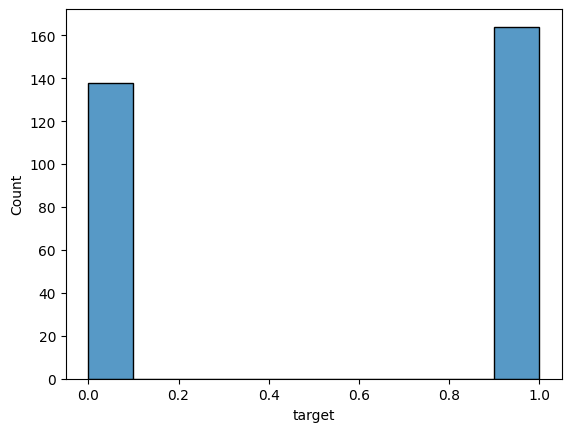

In [ ]:
# Mencetak histogram perbandingan data variabel "target"
sns.histplot(df_2['target'])

# Menampilkan jumlah data varable "target"
df_2['target'].value_counts()

target
1    164
0    164
Name: count, dtype: int64

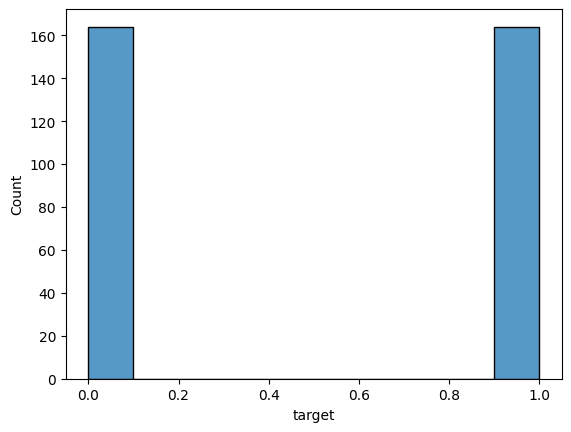

In [ ]:
from sklearn.utils import resample

# Proses Resampling Data dengan Random Oversampling,
# yakni dengan melakukan duplikasi acak pada data minoritas
min_cls = df_2[df_2['target'] == 0]
maj_cls = df_2[df_2['target'] == 1]

min_unsampled = resample(min_cls, replace=True, n_samples=len(maj_cls), random_state=42)

df_3 = pd.concat([maj_cls,min_unsampled])

sns.histplot(df_3['target'])
df_3['target'].value_counts()

## e. Feature encoding: Melakukan feature encoding jika diperlukan.

# 2. Exploratory Data Analysis (EDA)

## a. Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 5 to 512
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             328 non-null    int64  
 1   sex             328 non-null    object 
 2   cp              328 non-null    object 
 3   trestbps        328 non-null    int64  
 4   chol            328 non-null    int64  
 5   fbs             328 non-null    object 
 6   restecg         328 non-null    object 
 7   thalach         328 non-null    int64  
 8   exang           328 non-null    object 
 9   oldpeak         328 non-null    float64
 10  slope           328 non-null    object 
 11  ca              328 non-null    int64  
 12  thal            328 non-null    object 
 13  target          328 non-null    object 
 14  agegroups       328 non-null    object 
 15  trestbpsgroups  328 non-null    object 
 16  cholgroups      328 non-null    object 
 17  thalachrasio    328 non-null    float64


In [ ]:
df_3_num = [col for col in df_3.columns if df_3[col].dtype != 'object']
df_3_obj = [col for col in df_3.columns if df_3[col].dtype == 'object']

print('Atribute yang merupakan numerical :', df_3_num)
print('Atribute yang merupakan object :', df_3_obj)

Atribute yang merupakan numerical : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thalachrasio']
Atribute yang merupakan object : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target', 'agegroups', 'trestbpsgroups', 'cholgroups', 'thalachgroups']


PENJELASAN LENGKAP
1. **age** (usia): **Numerical** (data berupa angka)
2. **sex** (Jenis Kelamin): **Nominal** (True: Male or False: Female)
3. **cp** (Jenis nyeri dada): **Ordinal** (data kategori terdeinisi)
4. **trestbps** (Tekanan Darah Istirahat): **Numerical** (data berupa angka)
5. **chol** (Kolesterol serum): **Numerical** (data berupa angka)
6. **fbs** (Gula darah puasa): **Nominal** (data kategori terdefinisi)
7. **restecg** (Hasil EKG istirahat): **Ordinal** (data kategori terdefinisi)
8. **thalach** (Detak jantung maksimum): **Numerical** (data berupa angka)
9. **Exang** (angina yang dipicu olaharaga): **Nominal** (data kategori terdefinisi)
10. **oldpeak**(Depresi ST yang Dipicu Olahraga): **Numerical** (data berupa angka)
11. **slope** (Kemiringan Segmen ST Puncak Olahraga): **Ordinal** (data kategori terdefinisi)
12. **ca** (Jumlah Pembuluh Darah Utama yang Dicat dengan Fluoroskopi): **Numerical** (data berupa angka)
13. **thal** (jenis Thalassemia): **Nominal** (data kategori terdefinisi)
14. **target** (Target Penyakit Jantung): **Nominal** (data kategori terdefinisi)

## b. Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

1. Mean untuk mengukur pusat dari sekelompok data dan memberikan gambaran tentang nilai tengah atau "rata-rata" dari data tersebut.
2. Median menjadi ukuran yang baik ketika peneliti ingin menemukan nilai tengah yang representatif dari data yang mungkin memiliki nilai-nilai ekstrem yang dapat mempengaruhi mean (rata-rata)
3. Modus adalah ukuran yang bermanfaat dalam mengidentifikasi nilai yang dominan atau yang paling sering muncul dalam data, yang dapat memberikan wawasan tentang preferensi, tren, atau sifat-sifat data yang berbeda.

In [ ]:
# Menemukan mean tiap variable
print(df_3[df_3_num].mean())

age              54.759146
trestbps        132.262195
chol            243.701220
thalach         148.204268
oldpeak           1.091463
ca                0.707317
thalachrasio      0.896459
dtype: float64


In [ ]:
# Menemukan median tiap variable
df_3[df_3_num].describe().loc[['50%']]

,age,trestbps,chol,thalach,oldpeak,ca,thalachrasio
50%,56.0,130.0,240.0,152.0,0.8,0.0,0.91889


In [ ]:
# Menemukan Modus tiap variable
df_3[df_3_num].mode()

,age,trestbps,chol,thalach,oldpeak,ca,thalachrasio
0,57.0,120,212,132.0,0.0,0.0,1.0
1,NaN,140,269,NaN,NaN,NaN,NaN


## c. Menemukan dan mendeskripsikan statistical five summaries

Statictical five summaries ini berguna dalam analisis deskriptif atau selama penyelidikan awal terhadap dataset besar. Statistical five summaries terdiri atas lima value: nilai maximum, minimum, quartil 1, quartil 3, dan median

In [ ]:
df_3[df_3_num].describe().loc[['min', '25%', '50%', '75%', 'max']]

,age,trestbps,chol,thalach,oldpeak,ca,thalachrasio
min,29.0,94.0,126.00,88.0,0.0,0.0,0.539877
25%,48.0,120.0,207.75,132.0,0.0,0.0,0.821966
50%,56.0,130.0,240.00,152.0,0.8,0.0,0.918890
75%,62.0,140.0,273.00,166.0,1.8,1.0,0.993921
max,76.0,200.0,564.00,202.0,6.2,4.0,1.140127


## d. Mendeskripsikan distribusi data

In [ ]:
df_3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,1,0,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,2,1,1,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,0,1,0,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,1,3,0,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,1,2,0,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,2,1,0,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,1,1,1,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1,2,0,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,2,3,0,0.846154,2


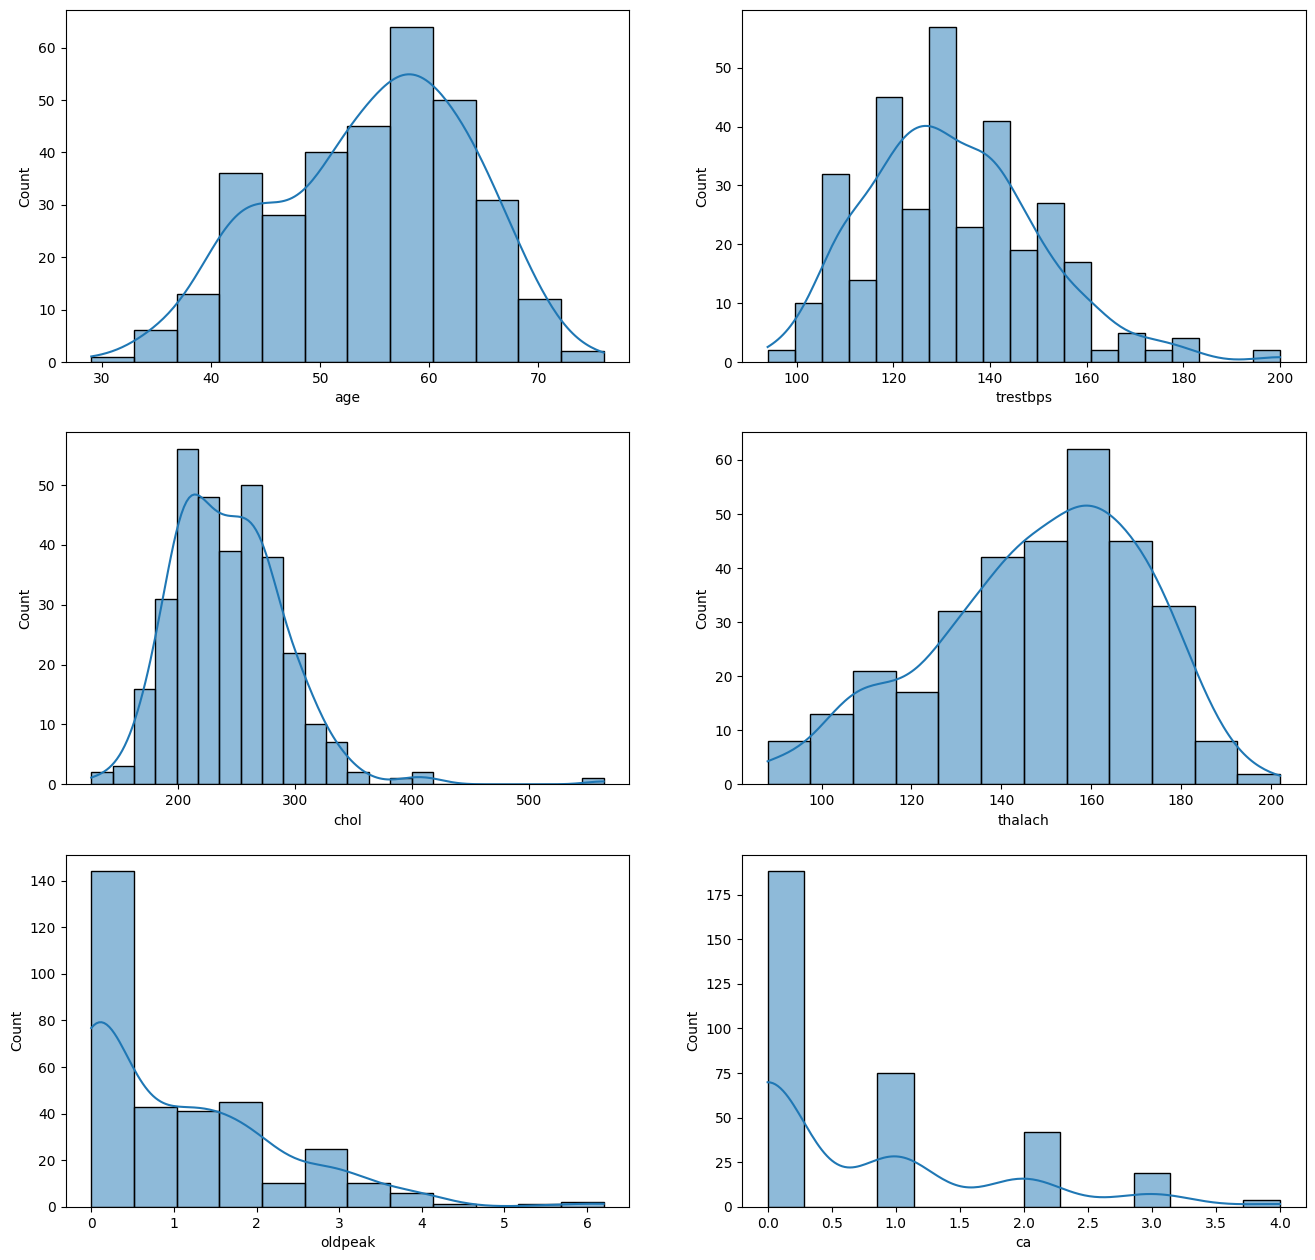

In [ ]:
# set ukuran figure
plt.figure(figsize=(16,32))

for i in range (6):
  plt.subplot(6,2,(i+1))
  sns.histplot(df_3[df_3_num[i]], kde=True)

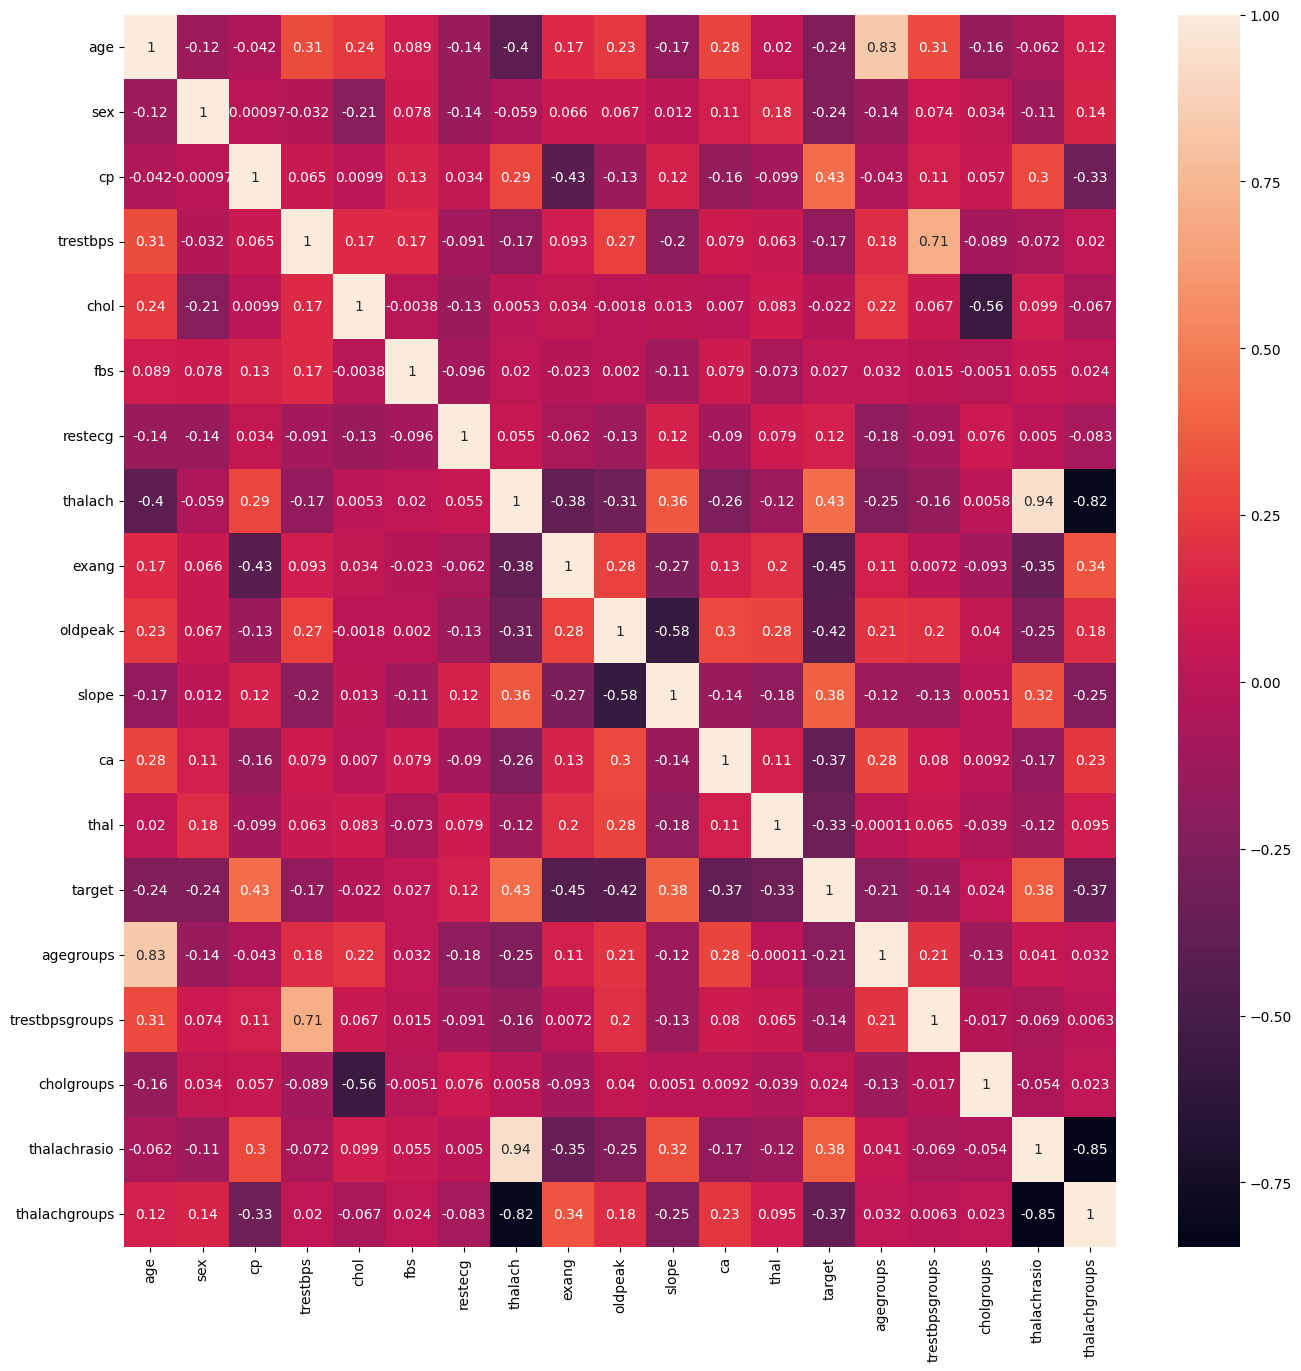

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sb

plt.figure(figsize=(16,16))

dataplot = sb.heatmap(df_3.corr(), annot=True)
mp.show()

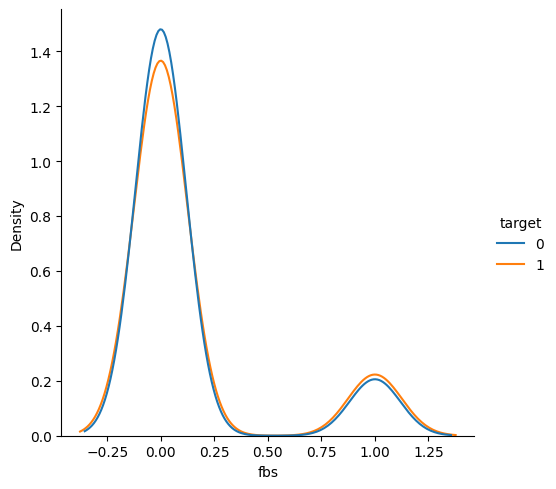

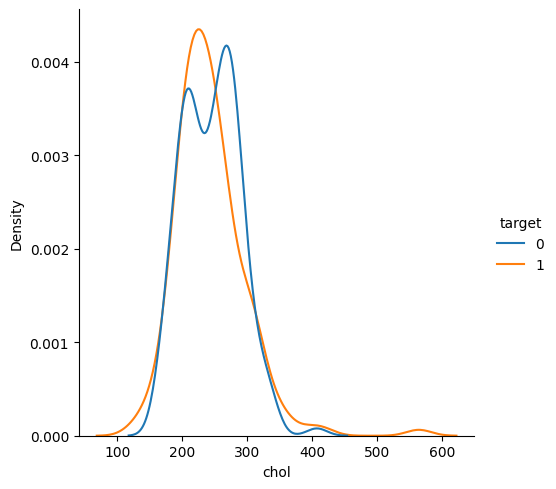

In [ ]:
import seaborn as sns
sns.displot(df_3, x="fbs", hue="target", kind='kde')
# sns.displot(df_3, x="age", hue="target", kind='kde')
sns.displot(df_3, x="chol", hue="target", kind='kde')

# 3. Feature Engineering

In [ ]:
df_4 = df_3

### Kategorisasi Usia

In [ ]:
def age_cat(age):
  if age < 2:
    return 'Infant'
  elif age < 5:
    return 'Toddler'
  elif age < 13:
    return 'Child'
  elif age < 20:
    return 'Teen'
  elif age < 40:
    return 'Adult'
  elif age < 60:
    return 'Middle Age Adult'
  elif age >= 60:
    return 'Senior Adult'
  else:
    return 'Unknown'

df_4['agegroups'] = df_4['age'].apply(age_cat)

df_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle Age Adult,1,0,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,Senior Adult,1,1,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Adult,1,0,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Middle Age Adult,3,0,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,Middle Age Adult,2,0,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,Senior Adult,1,0,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,Middle Age Adult,1,1,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Middle Age Adult,2,0,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,Senior Adult,3,0,0.846154,2


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('cp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('fbs').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('restecg').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='chol', y='thalach', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cp'].value_counts()
    for x_label, grp in _df_16.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('cp')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['fbs'].value_counts()
    for x_label, grp in _df_17.groupby('cp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cp')
_ = plt.ylabel('fbs')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['restecg'].value_counts()
    for x_label, grp in _df_18.groupby('fbs')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('fbs')
_ = plt.ylabel('restecg')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['exang'].value_counts()
    for x_label, grp in _df_19.groupby('restecg')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('restecg')
_ = plt.ylabel('exang')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['cp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='cp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['fbs'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='fbs', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['restecg'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='restecg', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Kategorisasi Tekanan Darah


In [ ]:
def trestbps_cat(trestbps):
  if trestbps < 120:
    return 'Normal'
  elif trestbps < 140:
    return 'Prehypertension'
  elif trestbps < 160:
    return 'Stage 1 Hypertension'
  elif trestbps < 180:
    return 'Stage 2 Hypertension'
  elif trestbps >= 180:
    return 'Hypertension Crisis'
  else:
    return 'Unknown'

df_4['trestbpsgroups'] = df_4['trestbps'].apply(trestbps_cat)

df_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle Age Adult,Normal,0,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,Senior Adult,Normal,1,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Adult,Normal,0,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Middle Age Adult,Stage 1 Hypertension,0,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,Middle Age Adult,Prehypertension,0,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,Senior Adult,Normal,0,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,Middle Age Adult,Normal,1,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Middle Age Adult,Prehypertension,0,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,Senior Adult,Stage 1 Hypertension,0,0.846154,2


### Kategorisasi Kadar Kolesterol

In [ ]:
def chol_cat(chol, age):
  if age < 20:
    if chol < 170:
      return 'Normal Cholesterol Levels'
    else:
      return 'High Cholesterol Level'
  elif age >= 20:
    if chol < 200:
      return 'Normal Cholesterol Levels'
    else:
      return 'High Cholesterol Level'
  else:
    return 'Unknown'

df_4['cholgroups'] = df_4[['chol', 'age']].apply(lambda x: chol_cat(x['chol'], x['age']), axis=1)

df_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle Age Adult,Normal,High Cholesterol Level,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,Senior Adult,Normal,Normal Cholesterol Levels,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Adult,Normal,High Cholesterol Level,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Middle Age Adult,Stage 1 Hypertension,High Cholesterol Level,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,Middle Age Adult,Prehypertension,High Cholesterol Level,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,Senior Adult,Normal,High Cholesterol Level,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,Middle Age Adult,Normal,Normal Cholesterol Levels,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Middle Age Adult,Prehypertension,High Cholesterol Level,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,Senior Adult,Stage 1 Hypertension,High Cholesterol Level,0.846154,2


### Rasio Detak Jantung Maximum berdasarkan Usia

In [ ]:
def thalach_ras(thalach, age):
  rasio = thalach/(220-age)
  return rasio

df_4['thalachrasio'] = df_4[['thalach', 'age']].apply(lambda x: thalach_ras(x['thalach'], x['age']), axis=1)

df_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle Age Adult,Normal,High Cholesterol Level,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,Senior Adult,Normal,Normal Cholesterol Levels,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Adult,Normal,High Cholesterol Level,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Middle Age Adult,Stage 1 Hypertension,High Cholesterol Level,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,Middle Age Adult,Prehypertension,High Cholesterol Level,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,Senior Adult,Normal,High Cholesterol Level,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,Middle Age Adult,Normal,Normal Cholesterol Levels,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Middle Age Adult,Prehypertension,High Cholesterol Level,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,Senior Adult,Stage 1 Hypertension,High Cholesterol Level,0.846154,2


### Kategorisasi Detak Jantung Maximum (berdasarkan Rasio)

In [ ]:
def thalach_cat(thalachrasio):
  if thalachrasio < 0.6:
    return 'Very Poor'
  elif thalachrasio < 0.7:
    return 'Poor'
  elif thalachrasio < 0.8:
    return 'Fair'
  elif thalachrasio < 0.9:
    return 'Good'
  elif thalachrasio >= 0.9:
    return 'Excellent'
  else:
    return 'Unknown'

df_4['thalachgroups'] = df_4['thalachrasio'].apply(thalach_cat)

df_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle Age Adult,Normal,High Cholesterol Level,0.753086,Fair
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,Senior Adult,Normal,Normal Cholesterol Levels,0.838926,Good
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Adult,Normal,High Cholesterol Level,1.032258,Excellent
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Middle Age Adult,Stage 1 Hypertension,High Cholesterol Level,0.840237,Good
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,Middle Age Adult,Prehypertension,High Cholesterol Level,0.952941,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,Senior Adult,Normal,High Cholesterol Level,0.857143,Good
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,Middle Age Adult,Normal,Normal Cholesterol Levels,1.005682,Excellent
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Middle Age Adult,Prehypertension,High Cholesterol Level,1.067485,Excellent
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,Senior Adult,Stage 1 Hypertension,High Cholesterol Level,0.846154,Good


In [ ]:
df_4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,Middle Age Adult,Normal,High Cholesterol Level,0.753086,Fair
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,Senior Adult,Normal,Normal Cholesterol Levels,0.838926,Good
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Adult,Normal,High Cholesterol Level,1.032258,Excellent
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,Middle Age Adult,Stage 1 Hypertension,High Cholesterol Level,0.840237,Good
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,Middle Age Adult,Prehypertension,High Cholesterol Level,0.952941,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,Senior Adult,Normal,High Cholesterol Level,0.857143,Good
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,Middle Age Adult,Normal,Normal Cholesterol Levels,1.005682,Excellent
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,Middle Age Adult,Prehypertension,High Cholesterol Level,1.067485,Excellent
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,Senior Adult,Stage 1 Hypertension,High Cholesterol Level,0.846154,Good


In [ ]:
# determining the name of the file
file_name = 'HealthDisease.xlsx'

# saving the excel
df_4.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


### Label Encoding

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 5 to 512
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             328 non-null    int64  
 1   sex             328 non-null    object 
 2   cp              328 non-null    object 
 3   trestbps        328 non-null    int64  
 4   chol            328 non-null    int64  
 5   fbs             328 non-null    object 
 6   restecg         328 non-null    object 
 7   thalach         328 non-null    int64  
 8   exang           328 non-null    object 
 9   oldpeak         328 non-null    float64
 10  slope           328 non-null    object 
 11  ca              328 non-null    int64  
 12  thal            328 non-null    object 
 13  target          328 non-null    object 
 14  agegroups       328 non-null    object 
 15  trestbpsgroups  328 non-null    object 
 16  cholgroups      328 non-null    object 
 17  thalachrasio    328 non-null    float64


In [ ]:
df_final = df_4

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()


df_final['agegroups'] = label_encoder.fit_transform(df_final['agegroups'])
df_final['agegroups'].unique()
df_final['agegroups'] = df_final['agegroups'].astype('object')

df_final['trestbpsgroups'] = label_encoder.fit_transform(df_final['trestbpsgroups'])
df_final['trestbpsgroups'].unique()
df_final['trestbpsgroups'] = df_final['trestbpsgroups'].astype('object')

df_final['cholgroups'] = label_encoder.fit_transform(df_final['cholgroups'])
df_final['cholgroups'].unique()
df_final['cholgroups'] = df_final['cholgroups'].astype('object')

df_final['thalachgroups'] = label_encoder.fit_transform(df_final['thalachgroups'])
df_final['thalachgroups'].unique()
df_final['thalachgroups'] = df_final['thalachgroups'].astype('object')

df_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,1,0,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,2,1,1,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,0,1,0,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,1,3,0,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,1,2,0,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,2,1,0,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,1,1,1,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1,2,0,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,2,3,0,0.846154,2


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 5 to 512
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             328 non-null    int64  
 1   sex             328 non-null    object 
 2   cp              328 non-null    object 
 3   trestbps        328 non-null    int64  
 4   chol            328 non-null    int64  
 5   fbs             328 non-null    object 
 6   restecg         328 non-null    object 
 7   thalach         328 non-null    int64  
 8   exang           328 non-null    object 
 9   oldpeak         328 non-null    float64
 10  slope           328 non-null    object 
 11  ca              328 non-null    int64  
 12  thal            328 non-null    object 
 13  target          328 non-null    object 
 14  agegroups       328 non-null    object 
 15  trestbpsgroups  328 non-null    object 
 16  cholgroups      328 non-null    object 
 17  thalachrasio    328 non-null    float64


## Distribusi Data

In [ ]:
df_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,1,0,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,2,1,1,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,0,1,0,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,1,3,0,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,1,2,0,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,0,2,1,0,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0,1,1,1,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1,2,0,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,2,3,0,0.846154,2


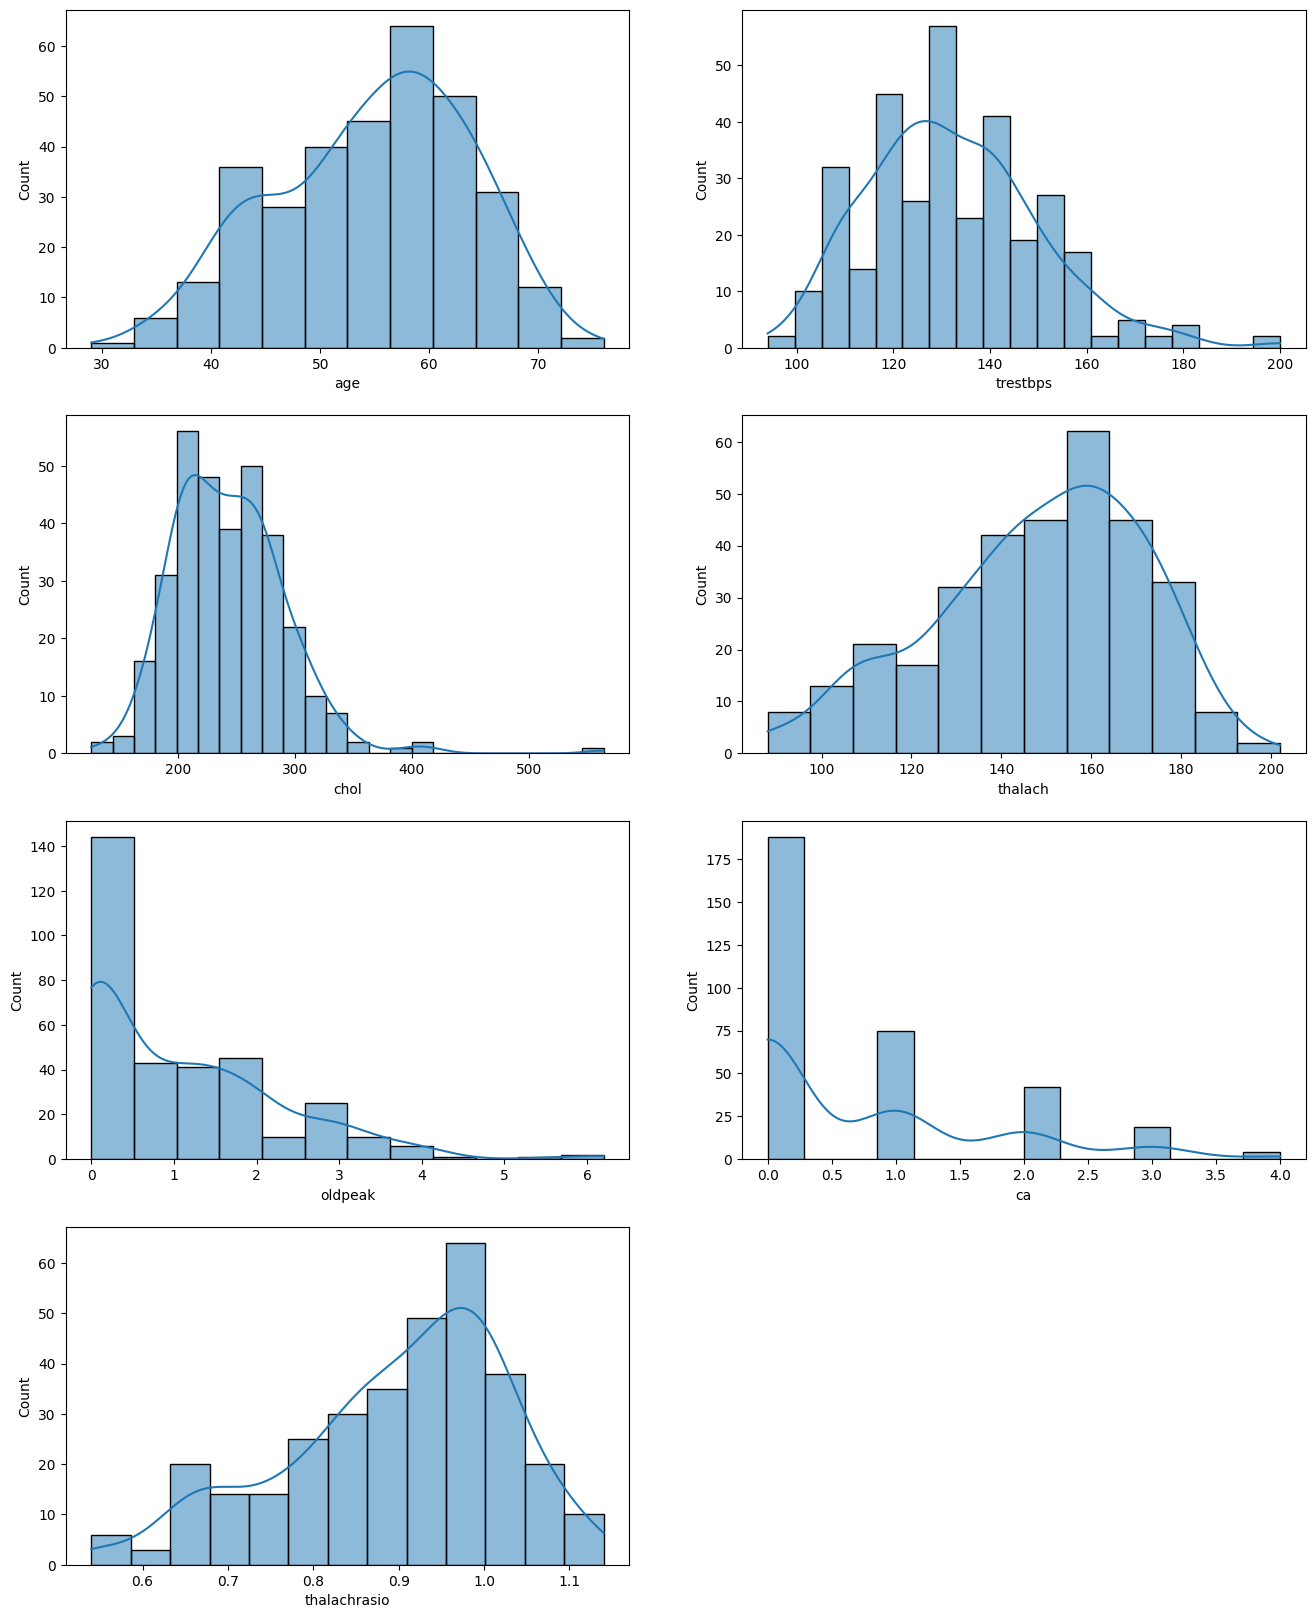

In [ ]:
# set ukuran figure
plt.figure(figsize=(16,36))
df_final_num = [col for col in df_final.columns if df_final[col].dtype != 'object']
df_final_obj = [col for col in df_final.columns if df_final[col].dtype == 'object']

for i in range (7):
  plt.subplot(7,2,(i+1))
  sns.histplot(df_final[df_final_num[i]], kde=True)

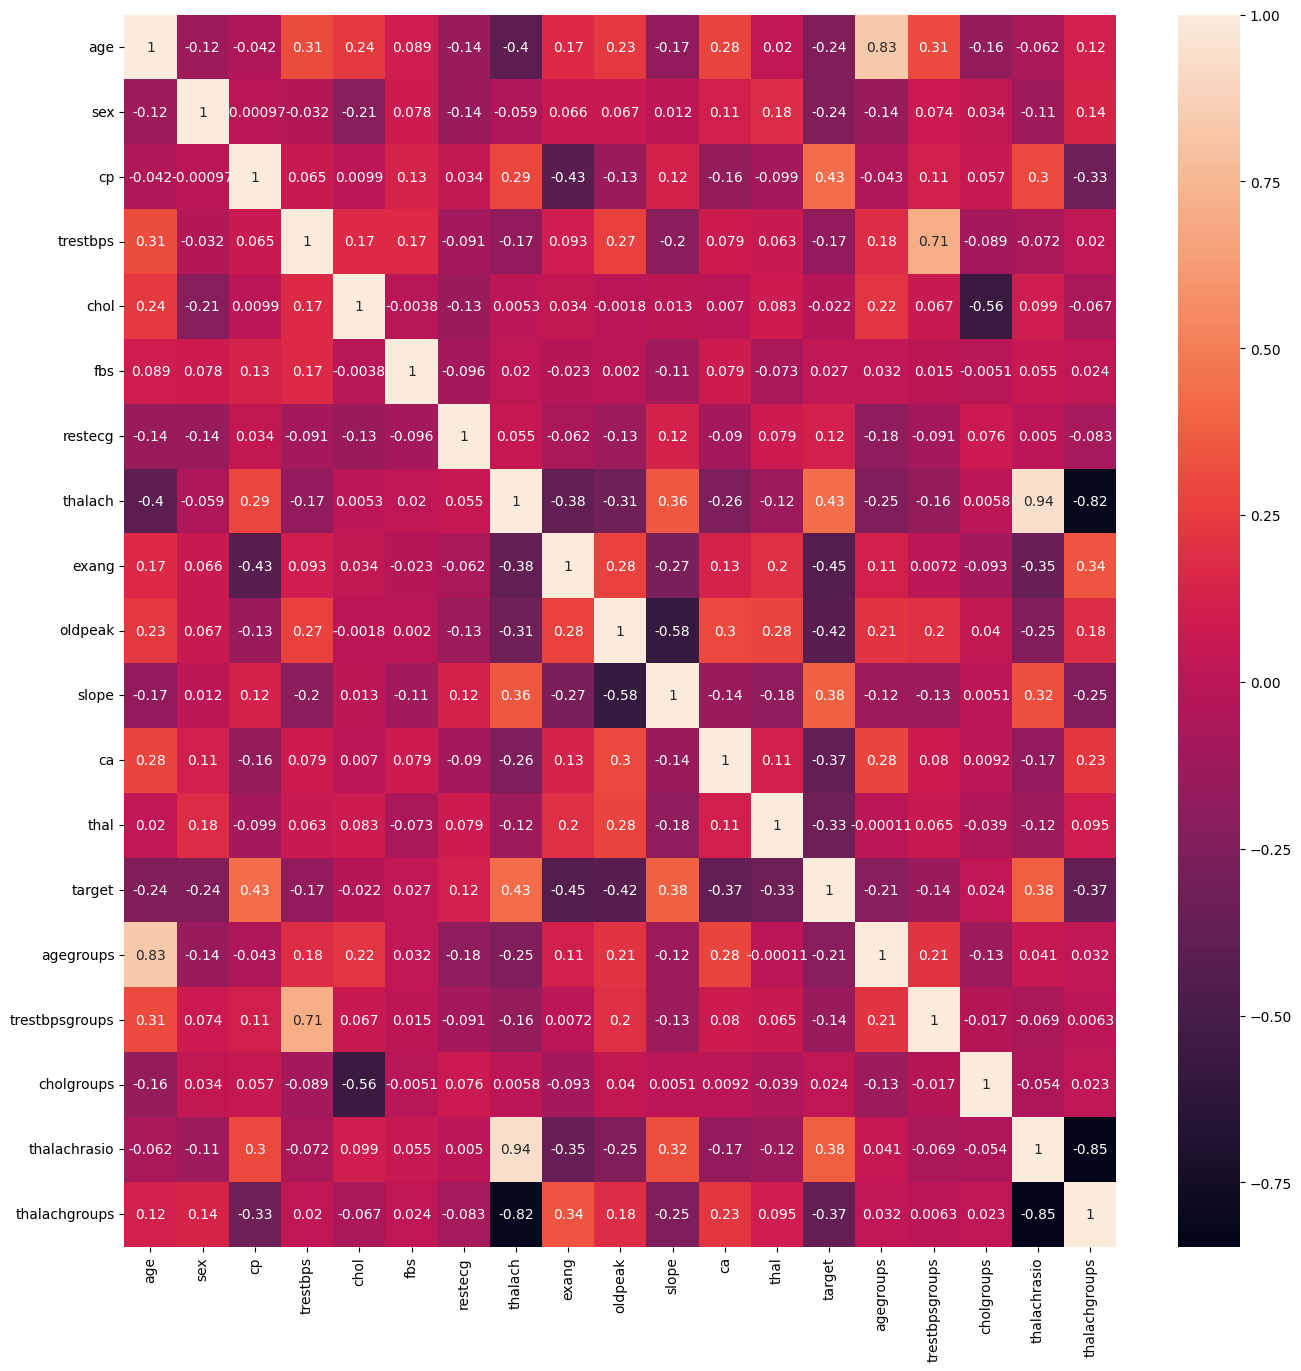

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sb

plt.figure(figsize=(16,16))

dataplot = sb.heatmap(df_final.corr(), annot=True)
mp.show()

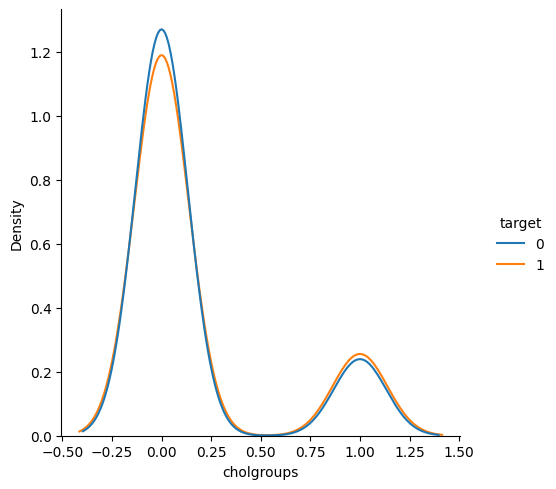

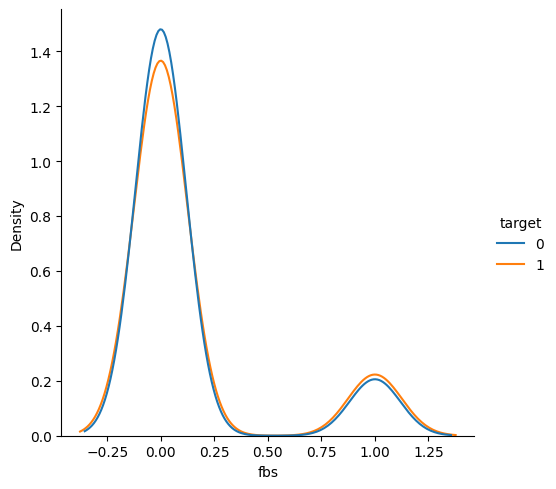

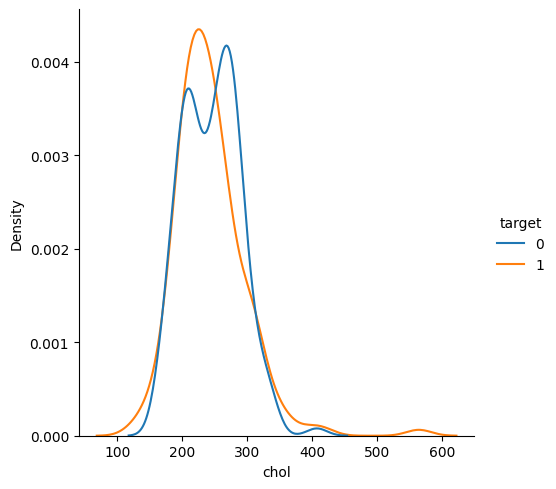

In [ ]:
import seaborn as sns
sns.displot(df_4, x="cholgroups", hue="target", kind='kde')
sns.displot(df_3, x="fbs", hue="target", kind='kde')
sns.displot(df_4, x="chol", hue="target", kind='kde')

#Assignment 3 - Machine Learrning

##Question
1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.
4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.
6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

target
1    164
0    164
Name: count, dtype: int64

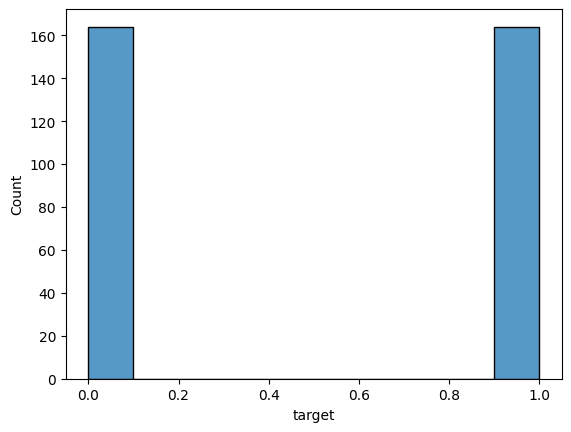

In [ ]:
# Mencetak histogram perbandingan data variabel "target"
sns.histplot(df_final['target'])

# Menampilkan jumlah data varable "target"
df_final['target'].value_counts()

In [ ]:
y = df_final['target']
x = df_final.drop(['target'], axis=1)

In [ ]:
display(x)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,agegroups,trestbpsgroups,cholgroups,thalachrasio,thalachgroups
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1,0,0.753086,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,2,1,1,0.838926,2
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,0,1,0,1.032258,0
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1,3,0,0.840237,2
18,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1,2,0,0.952941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,66,1,0,112,212,0,0,132,1,0.1,2,1,2,2,1,0,0.857143,2
110,44,1,0,110,197,0,0,177,0,0.0,2,1,2,1,1,1,1.005682,0
220,57,0,1,130,236,0,0,174,0,0.0,1,1,2,1,2,0,1.067485,0
594,64,1,0,145,212,0,0,132,0,2.0,1,2,1,2,3,0,0.846154,2


In [ ]:
display(y)

5      1
10     1
12     1
16     1
18     1
      ..
606    0
110    0
220    0
594    0
512    0
Name: target, Length: 328, dtype: object

In [ ]:
y=y.astype('int')

## Split Dataset

In [ ]:
#Splitting training dan tesing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [ ]:
x_train.shape

(262, 18)

In [ ]:
x_test.shape

(66, 18)

## Modelling

### Decision Tree Classifier

In [ ]:
#Modelling Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
DTC_pred = DTC.predict(x_test)

In [ ]:
#Evaluasi dengan classification report
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(y_test,DTC_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91        30
           1       0.90      0.97      0.93        36

    accuracy                           0.92        66
   macro avg       0.93      0.92      0.92        66
weighted avg       0.93      0.92      0.92        66



###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
GNB_pred = GNB.predict(x_test)

GNB_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
print('Classification Report \n',classification_report(y_test,GNB_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.76      0.89      0.82        36

    accuracy                           0.79        66
   macro avg       0.80      0.78      0.78        66
weighted avg       0.79      0.79      0.78        66



### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=10)

KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
KNN_pred = KNN.predict(x_test)

KNN_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
KNN_pred = KNN.predict(x_test)

print('Classification Report \n',classification_report(y_test,KNN_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.63      0.62        30
           1       0.69      0.67      0.68        36

    accuracy                           0.65        66
   macro avg       0.65      0.65      0.65        66
weighted avg       0.65      0.65      0.65        66



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogR = LogisticRegression(solver='liblinear', random_state=0)
LogR.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
LogR_pred = LogR.predict(x_test)
LogR_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
print('Classification Report \n',classification_report(y_test,LogR_pred))

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.84      0.89      0.86        36

    accuracy                           0.85        66
   macro avg       0.85      0.84      0.85        66
weighted avg       0.85      0.85      0.85        66



###Conclusion

Model Decision Tree Classifier mendapatkan skor akurasi terbaik, sehingga model ini akan digunakan pada langkah selanjutnya

## Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(DTC, x_train, y_train, cv=10)
display('Cross Validation Score: ', cv_score)

'Cross Validation Score: '

array([0.85185185, 0.85185185, 0.84615385, 0.84615385, 0.80769231,
       0.80769231, 0.88461538, 0.80769231, 0.80769231, 0.84615385])

##Learning Curves

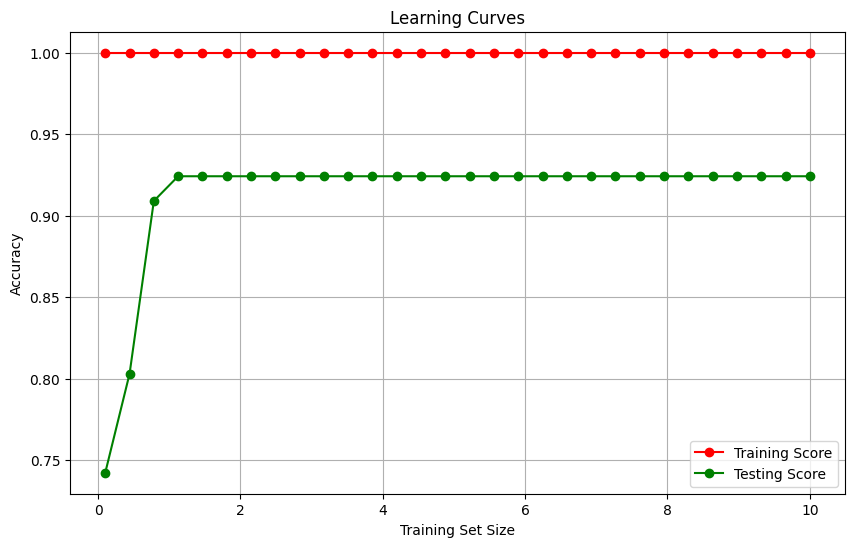

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.metrics import accuracy_score

#used to devide
train_sizes = np.linspace (0.1, 10, 30)
learning_curve_train = []
learning_curve_test = []
# clf = RandomForestClassifier (n_estimators=100, random_state=42)

for train_size in train_sizes:
  num_samples = int(train_size * len (x_train))
  x_subset = x_train [:num_samples]
  y_subset = y_train [:num_samples]
  DTC.fit(x_subset, y_subset)

  y_pred_train = DTC.predict(x_subset)
  acc_train = accuracy_score(y_subset, y_pred_train)
  learning_curve_train.append(acc_train)

  y_pred_test = DTC.predict(x_test)
  acc_test = accuracy_score(y_test, y_pred_test)
  learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend (loc="best")
plt.show()

##Akurasi

In [ ]:
score = DTC.score(x_test, y_test)
print('Skor Akurasi :', round(score,3))

Skor Akurasi : 0.924


##Hyperparameter Tuning

In [ ]:
GNB_max_depth = GaussianNB()
DTC_max_depth = DecisionTreeClassifier(max_depth=2, random_state=0)

DTC_max_depth.fit(x_train, y_train)
score_2 = DTC_max_depth.score(x_test, y_test)

In [ ]:
print('Score default: ', round(score,3))
print('Score max depth: ', round(score_2,2))

Score default:  0.924
Score max depth:  0.83


##Metric Evaluation

Text(95.72222222222221, 0.5, 'Truth')

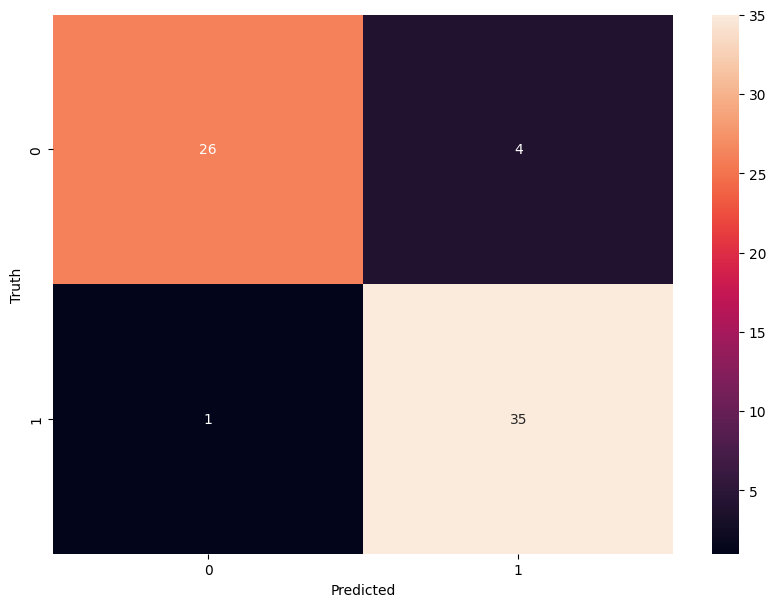

In [ ]:
from sklearn.metrics import confusion_matrix

#Hasil Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Export DataFrame

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 5 to 512
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             328 non-null    int64  
 1   sex             328 non-null    object 
 2   cp              328 non-null    object 
 3   trestbps        328 non-null    int64  
 4   chol            328 non-null    int64  
 5   fbs             328 non-null    object 
 6   restecg         328 non-null    object 
 7   thalach         328 non-null    int64  
 8   exang           328 non-null    object 
 9   oldpeak         328 non-null    float64
 10  slope           328 non-null    object 
 11  ca              328 non-null    int64  
 12  thal            328 non-null    object 
 13  target          328 non-null    object 
 14  agegroups       328 non-null    object 
 15  trestbpsgroups  328 non-null    object 
 16  cholgroups      328 non-null    object 
 17  thalachrasio    328 non-null    float64


In [ ]:
# determining the name of the file
file_name = 'HealthDisease.xlsx'

# saving the excel
df_final.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
